# Implementing Logical AND Function Using Hebbian Neural Network


### 1. Initializing Project and Reading Data From CSV Files 
In order to implement AND function, we need some libraries and packages:

- **numpy**: we use this library to calculate complex matrix operation
- **matplotlib**: this is a plotting library, here we use it in plotting **classification graph** and **test case accuracy graph** 
- **projects**: this is a project that contains all source code and implemented neural networks.

**The source code of this particular project implemented in the src/projects/hebb.py**

We are using 2 datasets for each functions (AND, OR): \
First one is our training dataset which includes **2 inputs**, **bias** and **target** value. **(training_dataset.csv)** \
Second on is for testing if our training process was successful or not. **(test_dataset.csv)**. \
All datasets exists in the **dataset** folder with CSV format. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from projects import HebbNetwork

and_training_dataset = np.genfromtxt("../dataset/hebb/and/training_dataset.csv", delimiter=',', skip_header=1)
and_test_dataset = np.genfromtxt("../dataset/hebb/and/test_dataset.csv", delimiter=',', skip_header=1)

or_training_dataset = np.genfromtxt("../dataset/hebb/or/training_dataset.csv", delimiter=',', skip_header=1)
or_test_dataset = np.genfromtxt("../dataset/hebb/or/test_dataset.csv", delimiter=',', skip_header=1)

numpy's genfromtxt() function expects three arguments and returns a **numpy array**: 
- **fname**: patch to our dataset.
- **delimiter**: delimiter which is used to separate values.
- **skip_header**: the number of lines to skip at the beginning of a file (we use it to omitting the x1, x2, bias and target labels).

### 2. Train The Networks
Here we train our two networks using train() function implemented in **hebb.py** in **src/projects**


In [3]:
and_hebb_network = HebbNetwork(input_count=2)
or_hebb_network = HebbNetwork(input_count=2)

for vector in and_training_dataset:
    and_hebb_network.train(x=vector[:2], bias=vector[2], target=vector[3])

for vector in or_training_dataset:
    or_hebb_network.train(x=vector[:2], bias=vector[2], target=vector[3])

### 3. Plotting Decision Regions and Classification Results
#### a) AND Function
In this part we have correct weights for our network \
All we need is line that separate decision regions. \
This line is x2 = b + w1x1 / -w2x2 for 2 inputs.

For example we want to plot a line in range of (-2, 3) for X1. \
If we give [-2 and 3] to our line, we get [3 and -2] for x2.

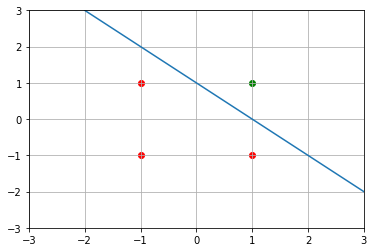

In [4]:
x1 = np.array([-2, 3]) # x1=[-2, 3]
x2 = (and_hebb_network.bias + and_hebb_network.w[0] * x1) / (- and_hebb_network.w[1]) # x2 = b + w1x1 / -w2, at the end will be x2=[3, -2]

plt.plot(x1, x2)
for vector in and_training_dataset:
    # if Target is 1 it means point is in the positive area (green points) otherwise its in the negative area (red points)
    if vector[3] == 1:  
        plt.scatter(vector[0], vector[1], color='green')
    else:
        plt.scatter(vector[0], vector[1], color='red')

plt.grid()
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

#### b) OR Function
Here also we want to plot a line in range of (-3, 2) for x1. \
If we give [-2 and 3] to our line, we get [-3 and 2] for x2.

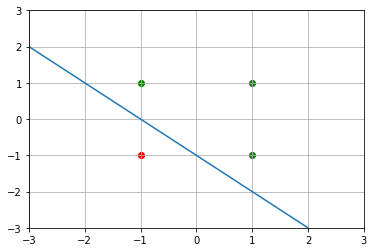

In [17]:
x1 = np.array([-3, 2]) # x1=[-3, 3]
x2 = (or_hebb_network.bias + (or_hebb_network.w[0] * x1)) / (-or_hebb_network.w[1]) # x2 = b + w1x1 / -w2, at the end will be x2=[-3, 2]

plt.plot(x1, x2)
for vector in or_training_dataset:
    # if Target is 1 it means point is in the positive area (green points) otherwise its in the negative area (red points)
    if vector[3] == 1:  
        plt.scatter(vector[0], vector[1], color='green')
    else:
        plt.scatter(vector[0], vector[1], color='red')

plt.grid()
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

### 4. Plotting The Accuracy Chart
#### a) AND Function
Here we plot a bar chart to indicate our accuaracy ratio, by counting number of cases which successfully produces the desired target value.

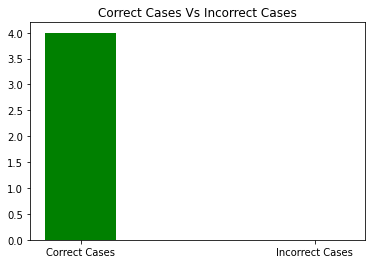

'Success Rate: 100.0 %'

In [6]:
correct_cases = 0
for test_vector in and_test_dataset:
    net_input = and_hebb_network.calculate_net_input(x=test_vector[:2])
    result = and_hebb_network.activation_function(net_input)
    if result == test_vector[2]:
        correct_cases += 1
incorrect_cases = and_test_dataset.shape[0] - correct_cases

labels = ['Correct Cases', 'Incorrect Cases']
data = [correct_cases, incorrect_cases]

plt.bar(labels, data, color=('green', 'red'), width=0.3)
plt.title('Correct Cases Vs Incorrect Cases')
plt.show()

success_percentage = round((correct_cases / and_test_dataset.shape[0]) * 100, 3)
f"Success Rate: {success_percentage} %"

#### b) OR Function

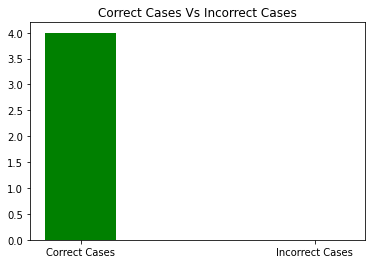

'Success Rate: 100.0 %'

In [7]:
correct_cases = 0
for test_vector in or_test_dataset:
    net_input = or_hebb_network.calculate_net_input(x=test_vector[:2])
    result = or_hebb_network.activation_function(net_input)
    if result == test_vector[2]:
        correct_cases += 1
incorrect_cases = or_test_dataset.shape[0] - correct_cases

labels = ['Correct Cases', 'Incorrect Cases']
data = [correct_cases, incorrect_cases]

plt.bar(labels, data, color=('green', 'red'), width=0.3)
plt.title('Correct Cases Vs Incorrect Cases')
plt.show()

success_percentage = round((correct_cases / or_test_dataset.shape[0]) * 100, 3)
f"Success Rate: {success_percentage} %"